In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/amazon.csv")

# **Persiapan Data(DATA PREPARATION) &  Pemebersihan Data (Data Cleaning)**

In [ ]:
#Checking out First Few Rows (1)

df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
#Checking Column Names (2)

df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
#Checking Number of Rows and Columns (3)

df.shape

(1465, 16)

In [ ]:
#Checking Data Types for each Column (4)

df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [ ]:
#Changing the data type of discounted price and actual price (5)

df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

In [ ]:
#Changing Datatype and values in Discount Percentage (6)

df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')

df['discount_percentage'] = df['discount_percentage'] / 100

df['discount_percentage']

0       0.64
1       0.43
2       0.90
3       0.53
4       0.61
        ... 
1460    0.59
1461    0.25
1462    0.28
1463    0.26
1464    0.22
Name: discount_percentage, Length: 1465, dtype: float64

In [ ]:
#Finding unusual string in the rating column (7)

df['rating'].value_counts()

4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: rating, dtype: int64

In [ ]:
#Inspecting the strange row (8)

df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [ ]:
#Changing Rating Columns Data Type(9)

df['rating'] = df['rating'].str.replace('|', '4.0').astype('float64')

In [ ]:
#Changing Rating Column Data Type (10)

df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

In [ ]:
#Checking for Duplicates (11)

duplicates = df.duplicated()
df[duplicates]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [ ]:
#Checking Missing Values (12)

df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [ ]:
#Creating a new DataFrame with Selected Column (13)

df1 = df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].copy()

In [ ]:
#Splitting the Strings in the category column (14)

catsplit = df['category'].str.split('|', expand=True)
catsplit

,0,1,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


In [ ]:
#Renaming category column (15)

catsplit = catsplit.rename(columns={0:'category_1', 1:'category_2', 2:'category_3'})

In [ ]:
#Adding categories to the new dataframe (16)

df1['category_1'] = catsplit['category_1']
df1['category_2'] = catsplit['category_2']

df1.drop(columns='category', inplace=True)

df1

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers&Accessories,Accessories&Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers&Accessories,Accessories&Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers&Accessories,Accessories&Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers&Accessories,Accessories&Peripherals
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers&Accessories,Accessories&Peripherals
...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,0.59,4.0,1090.0,Home&Kitchen,Kitchen&HomeAppliances
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,0.25,4.1,4118.0,Home&Kitchen,Kitchen&HomeAppliances
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,0.28,3.6,468.0,Home&Kitchen,"Heating,Cooling&AirQuality"
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,0.26,4.0,8031.0,Home&Kitchen,"Heating,Cooling&AirQuality"


In [ ]:
#Checking category_1 unique values (17)

df1['category_1'].value_counts()

Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: category_1, dtype: int64

In [ ]:
#Fixing Strings in the Category_1 Column (18)

df1['category_1'] = df1['category_1'].str.replace('&', ' & ')
df1['category_1'] = df1['category_1'].str.replace('OfficeProducts', 'Office Products')
df1['category_1'] = df1['category_1'].str.replace('MusicalInstruments', 'Musical Instruments')
df1['category_1'] = df1['category_1'].str.replace('HomeImprovement', 'Home Improvement')

In [ ]:
#Checking category_2 unique values (19)

df1['category_2'].value_counts()

Accessories&Peripherals                    381
Kitchen&HomeAppliances                     308
HomeTheater,TV&Video                       162
Mobiles&Accessories                        161
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           34
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     14
Accessories                                 14
Printers,Inks&Accessories                   11
CraftMaterials                               7
Components                                   5
OfficeElectronics                            4
Electrical                                   2
Monitors                                     2
Microphones  

In [ ]:
#Fixing Strings in Category_2 column (20)

df1['category_2'] = df1['category_2'].str.replace('&', ' & ')
df1['category_2'] = df1['category_2'].str.replace(',', ', ')
df1['category_2'] = df1['category_2'].str.replace('HomeAppliances', 'Home Appliances')
df1['category_2'] = df1['category_2'].str.replace('AirQuality', 'Air Quality')
df1['category_2'] = df1['category_2'].str.replace('WearableTechnology', 'Wearable Technology')
df1['category_2'] = df1['category_2'].str.replace('NetworkingDevices', 'Networking Devices')
df1['category_2'] = df1['category_2'].str.replace('OfficePaperProducts', 'Office Paper Products')
df1['category_2'] = df1['category_2'].str.replace('ExternalDevices', 'External Devices')
df1['category_2'] = df1['category_2'].str.replace('DataStorage', 'Data Storage')
df1['category_2'] = df1['category_2'].str.replace('HomeStorage', 'Home Storage')
df1['category_2'] = df1['category_2'].str.replace('HomeAudio', 'Home Audio')
df1['category_2'] = df1['category_2'].str.replace('GeneralPurposeBatteries', 'General Purpose Batteries')
df1['category_2'] = df1['category_2'].str.replace('BatteryChargers', 'Battery Chargers')
df1['category_2'] = df1['category_2'].str.replace('CraftMaterials', 'Craft Materials')
df1['category_2'] = df1['category_2'].str.replace('OfficeElectronics', 'Office Electronics')
df1['category_2'] = df1['category_2'].str.replace('PowerAccessories', 'Power Accessories')
df1['category_2'] = df1['category_2'].str.replace('CarAccessories', 'Car Accessories')
df1['category_2'] = df1['category_2'].str.replace('HomeMedicalSupplies', 'Home Medical Supplies')
df1['category_2'] = df1['category_2'].str.replace('HomeTheater', 'Home Theater')

In [ ]:
# Removing Whitespace from product_id (21)

df1['product_id'].str.strip()

0       B07JW9H4J1
1       B098NS6PVG
2       B096MSW6CT
3       B08HDJ86NZ
4       B08CF3B7N1
           ...    
1460    B08L7J3T31
1461    B01M6453MB
1462    B009P2LIL4
1463    B00J5DYCCA
1464    B01486F4G6
Name: product_id, Length: 1465, dtype: object

In [ ]:
#Creating Categories for Rankings (22)

rating_score = []

for score in df1['rating']:
    if score < 2.0 : rating_score.append('Poor')
    elif score < 3.0 : rating_score.append('Below Average')
    elif score < 4.0 : rating_score.append('Average')
    elif score < 5.0 : rating_score.append('Above Average')
    elif score == 5.0 : rating_score.append('Excellent')

In [ ]:
#Creating A new Column and Changing the Data Type (23)

df1['rating_score'] = rating_score

df1['rating_score'] = df1['rating_score'].astype('category')

In [ ]:
#Reordered Categories (24)

df1['rating_score'] = df1['rating_score'].cat.reorder_categories(['Below Average', 'Average', 'Above Average', 'Excellent'], ordered=True)

In [ ]:
#Creating Difference of Price Column between Actual Price and Discounted Price (25)

df1['difference_price'] = df1['actual_price'] - df1['discounted_price']

In [ ]:
#Result After Cleaning and Preperation after first cleaned dataframe (26)

df1.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2,rating_score,difference_price
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Above Average,700.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,Above Average,150.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,Average,1700.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,Above Average,370.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,Above Average,245.0


In [ ]:
#Subsetting Reviewers Identifications (27)

reviewers = df[['user_id','user_name']]
reviewers

,user_id,user_name
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp..."
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac..."
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal..."
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ..."
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK..."
...,...,...
1460,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome..."
1461,"AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH..."
1462,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz..."
1463,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan..."


In [ ]:
#Splitting the strings in user_id column (28)

reviewer_id_split = reviewers['user_id'].str.split(',', expand=False)

reviewer_id_split

0       [AG3D6O4STAQKAY2UVGEUV46KN35Q, AHMY5CWJMMK5BJR...
1       [AECPFYFQVRUWC3KGNLJIOREFP5LQ, AGYYVPDD7YG7FYN...
2       [AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA, AESFLDV2PT363T2...
3       [AEWAZDZZJLQUYVOVGBEUKSLXHQ5A, AG5HTSFRRE6NL3M...
4       [AE3Q6KSUK5P75D5HFYHCRAOLODSA, AFUGIFH5ZAFXRDS...
                              ...                        
1460    [AHITFY6AHALOFOHOZEOC6XBP4FEA, AFRABBODZJZQB6Z...
1461    [AFG5FM3NEMOL6BNFRV2NK5FNJCHQ, AGEINTRN6Z563RM...
1462    [AGVPWCMAHYQWJOQKMUJN4DW3KM5Q, AF4Q3E66MY4SR7Y...
1463    [AF2JQCLSCY3QJATWUNNHUSVUPNQQ, AFDMLUXC5LS5RXD...
1464    [AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA, AG7QNJ2SCS5VS5V...
Name: user_id, Length: 1465, dtype: object

In [ ]:
#Making user id display 1 id per row (29)

reviewer_id_exp = reviewer_id_split.explode()

reviewer_id_clean = reviewer_id_exp.reset_index(drop=True)

reviewer_id_clean

0        AG3D6O4STAQKAY2UVGEUV46KN35Q
1        AHMY5CWJMMK5BJRBBSNLYT3ONILA
2        AHCTC6ULH4XB6YHDY6PCH2R772LQ
3        AGYHHIERNXKA6P5T7CZLXKVPT7IQ
4        AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q
                     ...             
11498    AHXCDNSXAESERITAFELQABFVNLCA
11499    AGRZD6CHLCUNOLMMIMIHUCG7PIFA
11500    AFQZVGSOSOJHKFQQMCEI4725QEKQ
11501    AEALVGXXIP46OZVXKRUXSDWZJMEA
11502    AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ
Name: user_id, Length: 11503, dtype: object

In [ ]:
#Splitting the strings in user_name column (30)

reviewer_name_split = reviewers['user_name'].str.split(',', expand=False)

reviewer_name_split

0       [Manav, Adarsh gupta, Sundeep, S.Sayeed Ahmed,...
1       [ArdKn, Nirbhay kumar, Sagar Viswanathan, Asp,...
2       [Kunal, Himanshu, viswanath, sai niharka, saqi...
3       [Omkar dhale, JD, HEMALATHA, Ajwadh a., amar s...
4       [rahuls6099, Swasat Borah, Ajay Wadke, Pranali...
                              ...                        
1460    [Prabha ds, Raghuram bk, Real Deal, Amazon Cus...
1461    [Manu Bhai, Naveenpittu, Evatira Sangma, JAGAN...
1462    [Nehal Desai, Danish Parwez, Amazon Customer, ...
1463    [Shubham Dubey, E.GURUBARAN, Mayank S., eusuf ...
1464    [Rajib, Ajay B, Vikas Kahol, PARDEEP, Anindya ...
Name: user_name, Length: 1465, dtype: object

In [ ]:
#Making user name display 1 id per row (31)

review_name_exp = reviewer_name_split.explode()

reviewer_name_clean = review_name_exp.reset_index(drop=True)

reviewer_name_clean

0                   Manav
1            Adarsh gupta
2                 Sundeep
3          S.Sayeed Ahmed
4          jaspreet singh
               ...       
11510             PARDEEP
11511    Anindya Pramanik
11512         Vikas Singh
11513     Harshada Pimple
11514              Saw a.
Name: user_name, Length: 11515, dtype: object

In [ ]:
#Creating 2 Data Frames to be merged (32)

df21 = pd.DataFrame(data=reviewer_id_clean)
df22 = pd.DataFrame(data=reviewer_name_clean)

In [ ]:
#Merging the 2 dataframe containing user_id and user_name (33)

df2 = pd.merge(df21, df22, left_index=True, right_index=True)

In [ ]:
#Final Check for the new dataframe (34)

df2.head()

,user_id,user_name
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,Manav
1,AHMY5CWJMMK5BJRBBSNLYT3ONILA,Adarsh gupta
2,AHCTC6ULH4XB6YHDY6PCH2R772LQ,Sundeep
3,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,S.Sayeed Ahmed
4,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,jaspreet singh


In [ ]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1463.000000
mean,3125.310874,5444.990635,0.476915,4.096519,18295.541353
std,6944.304394,10874.826864,0.216359,0.291585,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1186.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17336.500000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


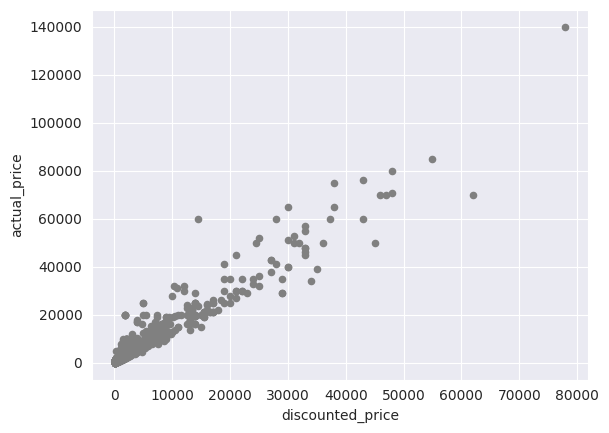

In [ ]:
df.plot.scatter(x='discounted_price', y='actual_price', color='gray')
plt.show()

In [ ]:

mall_scaled = df.copy()
cols_to_scale = ['discount_percentage', 'discounted_price', 'actual_price']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

mall_scaled[cols_to_scale] = scaler.fit_transform(mall_scaled[cols_to_scale])

In [ ]:
mall_scaled[cols_to_scale].describe()

,discount_percentage,discounted_price,actual_price
count,1.465000e+03,1465.000000,1.465000e+03
mean,7.760194e-17,0.000000,-1.940048e-17
std,1.000341e+00,1.000341,1.000341e+00
min,-2.205027e+00,-0.444589,-4.972803e-01
25%,-7.254989e-01,-0.403391,-4.272782e-01
50%,1.067356e-01,-0.335110,-3.490894e-01
75%,7.077938e-01,-0.162247,-1.057841e-01
max,2.141087e+00,10.784414,1.236810e+01


In [ ]:
from sklearn.cluster import KMeans
cluster_cols = ['discounted_price', 'actual_price']
markers = ['x', '*', '.', '|', '_', '1', '2']

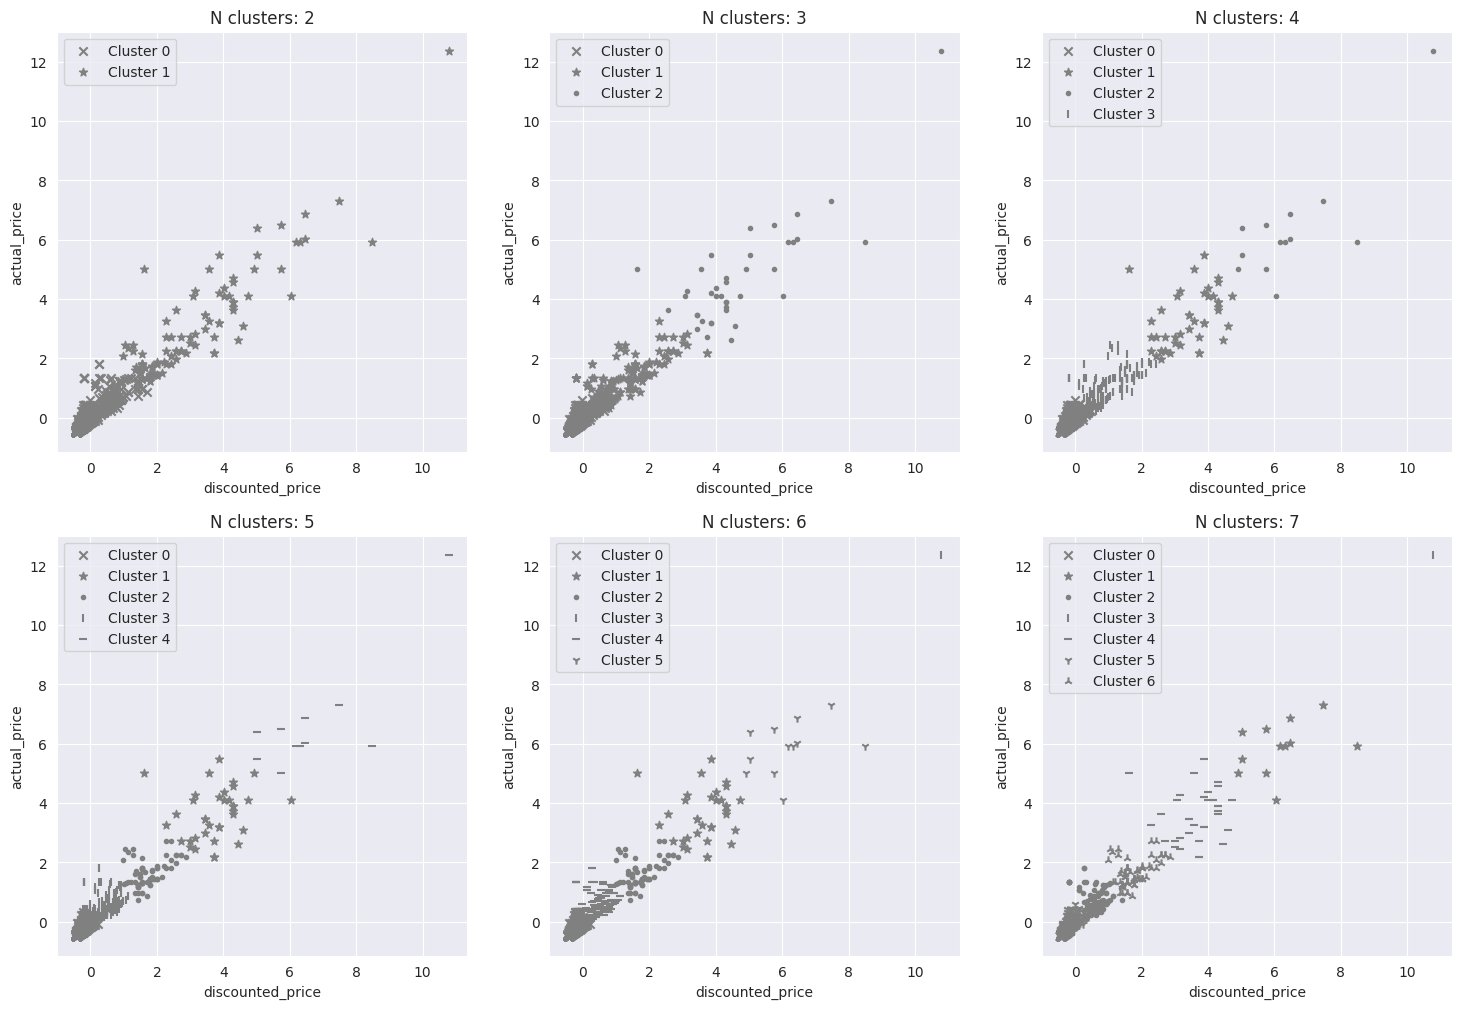

In [ ]:
plt.figure(figsize=[18,12])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=42)
    mall_scaled['Cluster']= model.fit_predict(mall_scaled[cluster_cols])


    plt.subplot(2,3, n-1)
    for clust in range(n):
        temp = mall_scaled[mall_scaled.Cluster == clust]
        plt.scatter(temp.discounted_price, temp.actual_price, \
                marker=markers[clust], \
                label="Cluster "+str(clust), color='gray')
        plt.title("N clusters: "+str(n))
        plt.xlabel('discounted_price')
        plt.ylabel('actual_price')
        plt.legend()

plt.show()

In [ ]:
K = 3
model = KMeans(n_clusters=K, random_state=42)
model.fit(mall_scaled[cluster_cols])

KMeans(n_clusters=3, random_state=42)

In [ ]:
print(model.inertia_)

465.3389129670618


In [ ]:
X = mall_scaled[cluster_cols]
inertia_scores = []
for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42).fit(X).inertia_
    inertia_scores.append(inertia)

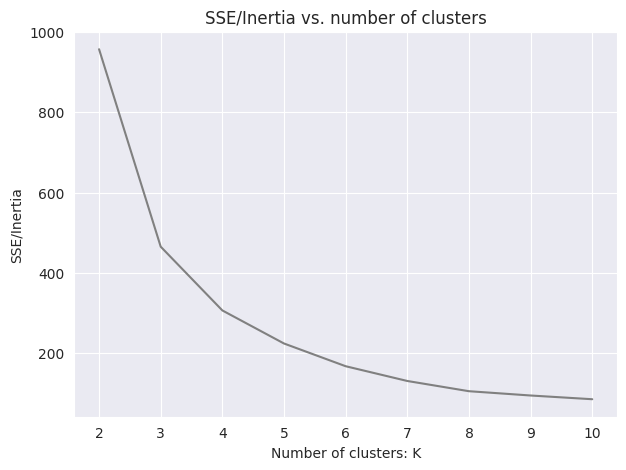

In [ ]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores, color='gray')
plt.title("SSE/Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()

In [ ]:
cluster_cols = ['discounted_price', 'actual_price']
model = KMeans(n_clusters=3, random_state=42)
cluster_assignments = model.fit_predict(X)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster_assignments)
print(silhouette_avg)

0.814414145608616


In [ ]:
silhouette_scores = []
for K in range(2, 11):
    model = KMeans(n_clusters=K, random_state=42)
    cluster_assignments = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_assignments)
    silhouette_scores.append(silhouette_avg)

In [ ]:
silhouette_scores

[0.8565383000821741,
 0.814414145608616,
 0.8012248457157881,
 0.7492912345200192,
 0.749557935269822,
 0.6394835725105802,
 0.6345569443968848,
 0.6329045618143386,
 0.6322604701530996]

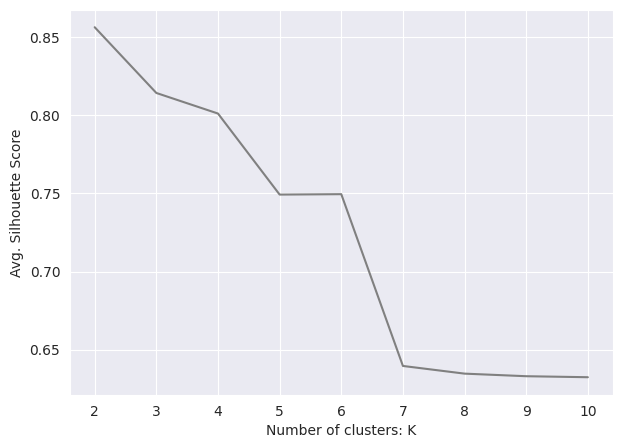

In [ ]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), silhouette_scores, color='gray')
plt.xlabel("Number of clusters: K")
plt.ylabel('Avg. Silhouette Score')
plt.show()

# **DATA EXPLORATION**

In [ ]:
#Setting Visualization Style (35)

sns.set_style(style='darkgrid')

sns.set_palette(palette="icefire")

Observation 1: Product Category

In [ ]:
#Main Category and Sub-Categor (36)

main_sub = df1[['category_1', 'category_2', 'product_id']]

main_sub = main_sub.rename(columns={'category_1' :'Main Category', 'category_2' : 'Sub-Category', 'product_id':'Product ID'})

main_sub_piv = pd.pivot_table(main_sub, index=['Main Category', 'Sub-Category'], aggfunc='count')

main_sub_piv

Product ID
Main Category           Sub-Category                                            
Car & Motorbike         Car Accessories                                        1
Computers & Accessories Accessories & Peripherals                            381
                        Components                                             5
                        External Devices & Data Storage                       18
                        Laptops                                                1
                        Monitors                                               2
                        Networking Devices                                    34
                        Printers, Inks & Accessories                          11
                        Tablets                                                1
Electronics             Accessories                                           14
                        Cameras & Photography                                 16
                        General Purpose Batteries & Battery Chargers          14
                        Headphones, Earbuds & Accessories                     66
                        Home Audio                                            16
                        Home Theater, TV & Video                             162
                        Mobiles & Accessories                                161
                        Power Accessories                                      1
                        Wearable Technology                                   76
Health & PersonalCare   Home Medical Supplies & Equipment                      1
Home & Kitchen          Craft Materials                                        7
                        Heating, Cooling & Air Quality                       116
                        Home Storage & Organization                           16
                        Kitchen & Dining                                       1
                        Kitchen & Home Appliances                            308
Home Improvement        Electrical                                             2
Musical Instruments     Microphones                                            2
Office Products         Office Electronics                                     4
                        Office Paper Products                                 27
Toys & Games            Arts & Crafts                                          1

**K-MEANS CLUSTERING**

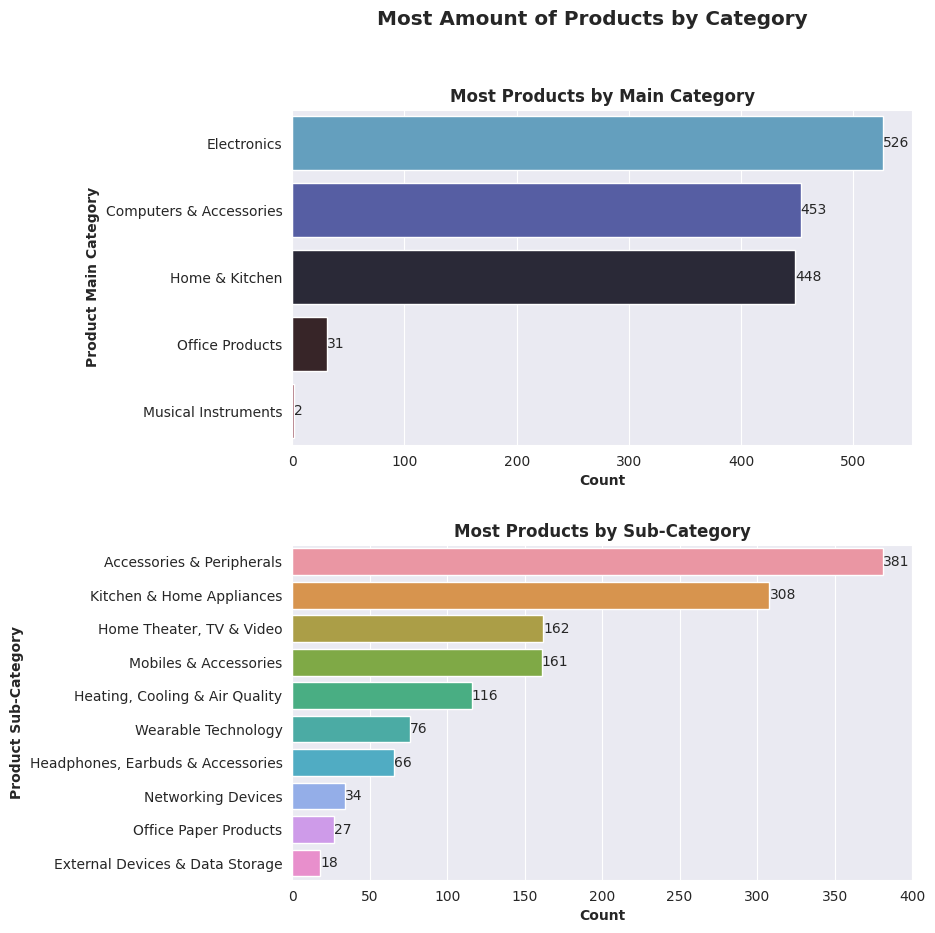

In [ ]:
#Most amount of products by category (37)

most_main_items = df1['category_1'].value_counts().head(5).rename_axis('category_1').reset_index(name='counts')

most_sub_items = df1['category_2'].value_counts().head(10).rename_axis('category_2').reset_index(name='counts')

fig, ax = plt.subplots(2, 1, figsize=(8, 10))
fig.suptitle('Most Amount of Products by Category', fontweight='heavy', size='x-large')

sns.barplot(ax=ax[0], data=most_main_items, x='counts', y='category_1')
sns.barplot(ax=ax[1], data=most_sub_items, x='counts', y='category_2')

plt.subplots_adjust(hspace = 0.3)

ax[0].set_xlabel('Count', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')

ax[1].set_xlabel('Count', fontweight='bold')
ax[1].set_ylabel('Product Sub-Category', fontweight='bold')

ax[0].set_title('Most Products by Main Category', fontweight='bold')
ax[1].set_title('Most Products by Sub-Category', fontweight='bold')


ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()

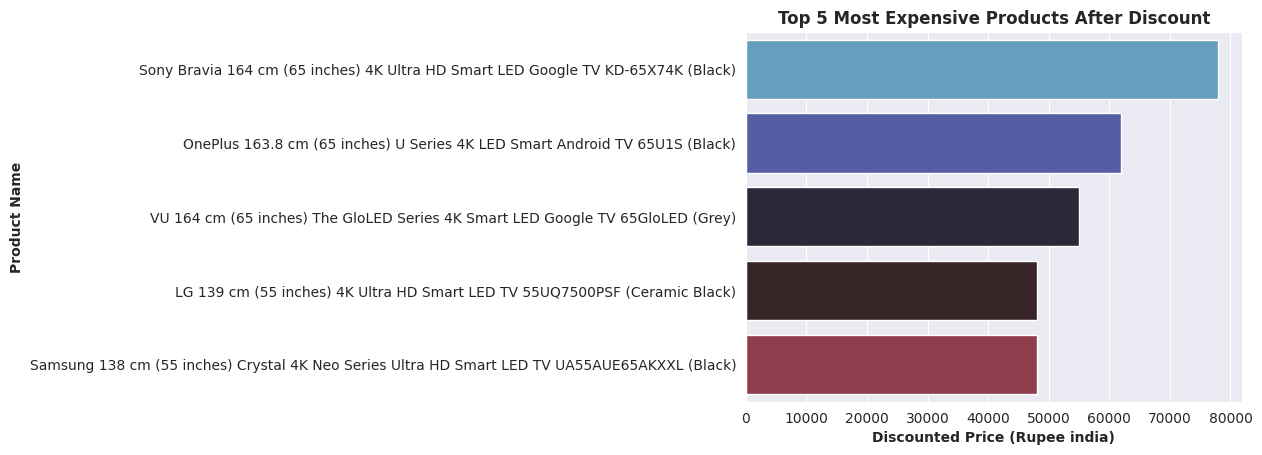

In [ ]:
#Top 5 Most Expensive Products After Discount (38)

disc_exp = sns.barplot(data=df1.sort_values('discounted_price', ascending=False).head(5), x='discounted_price', y='product_name')

disc_exp.set_title('Top 5 Most Expensive Products After Discount', fontweight='bold')
disc_exp.set_xlabel('Discounted Price (Rupee india)', fontweight='bold')
disc_exp.set_ylabel('Product Name', fontweight='bold')

plt.show()

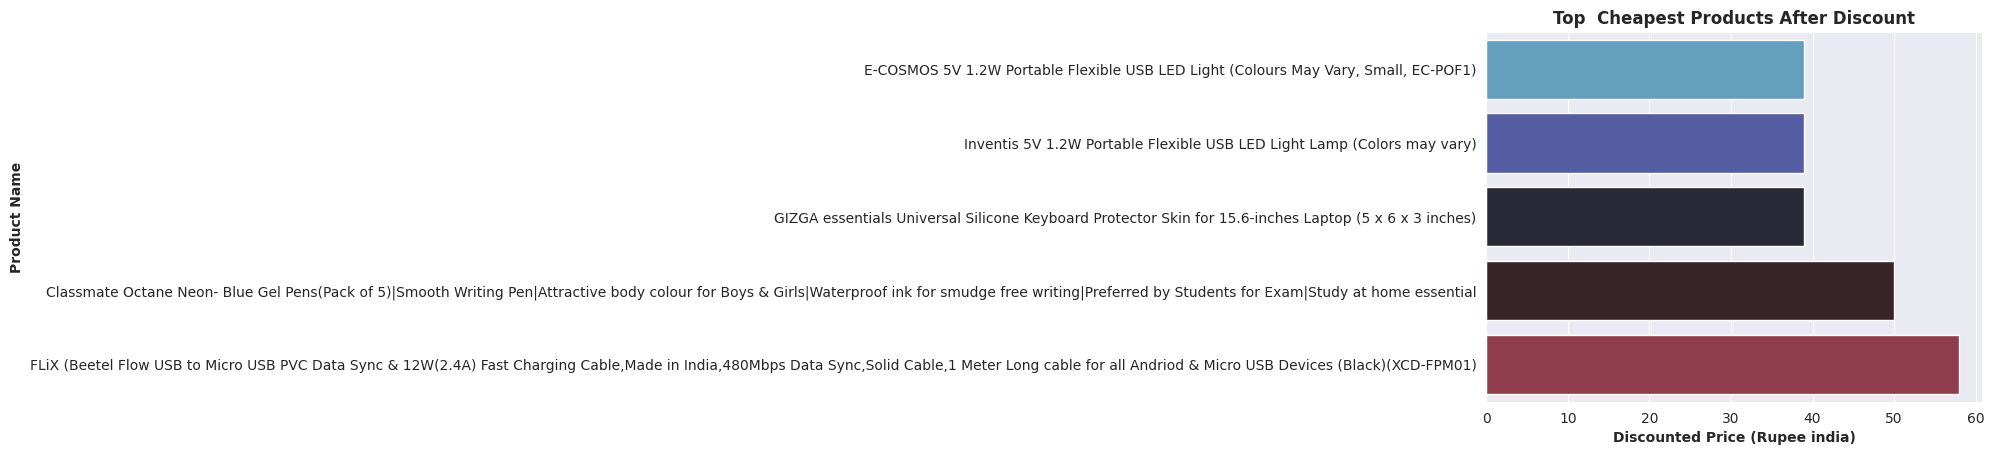

In [ ]:
#Top 5 Cheapest Products After Discount (39)

disc_cheap = sns.barplot(data=df1.sort_values('discounted_price').head(5), x='discounted_price', y='product_name')

disc_cheap.set_title('Top  Cheapest Products After Discount', fontweight='bold')
disc_cheap.set_xlabel('Discounted Price (Rupee india)', fontweight='bold')
disc_cheap.set_ylabel('Product Name', fontweight='bold')

plt.show()

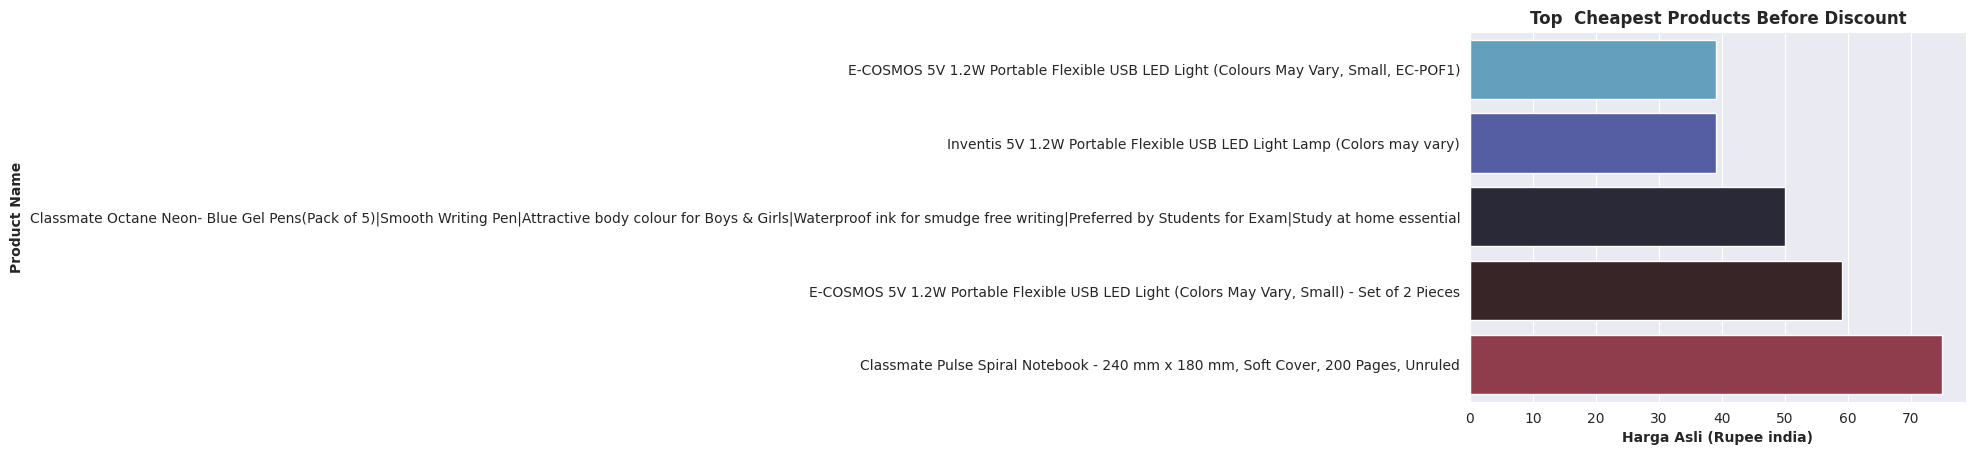

In [ ]:
#Top 5 Cheapest Products Before Discount (40)

disc_cheap = sns.barplot(data=df1.sort_values('actual_price').head(5), x='actual_price', y='product_name')

disc_cheap.set_title('Top  Cheapest Products Before Discount', fontweight='bold')
disc_cheap.set_xlabel('Harga Asli (Rupee india)', fontweight='bold')
disc_cheap.set_ylabel('Product Name', fontweight='bold')

plt.show()

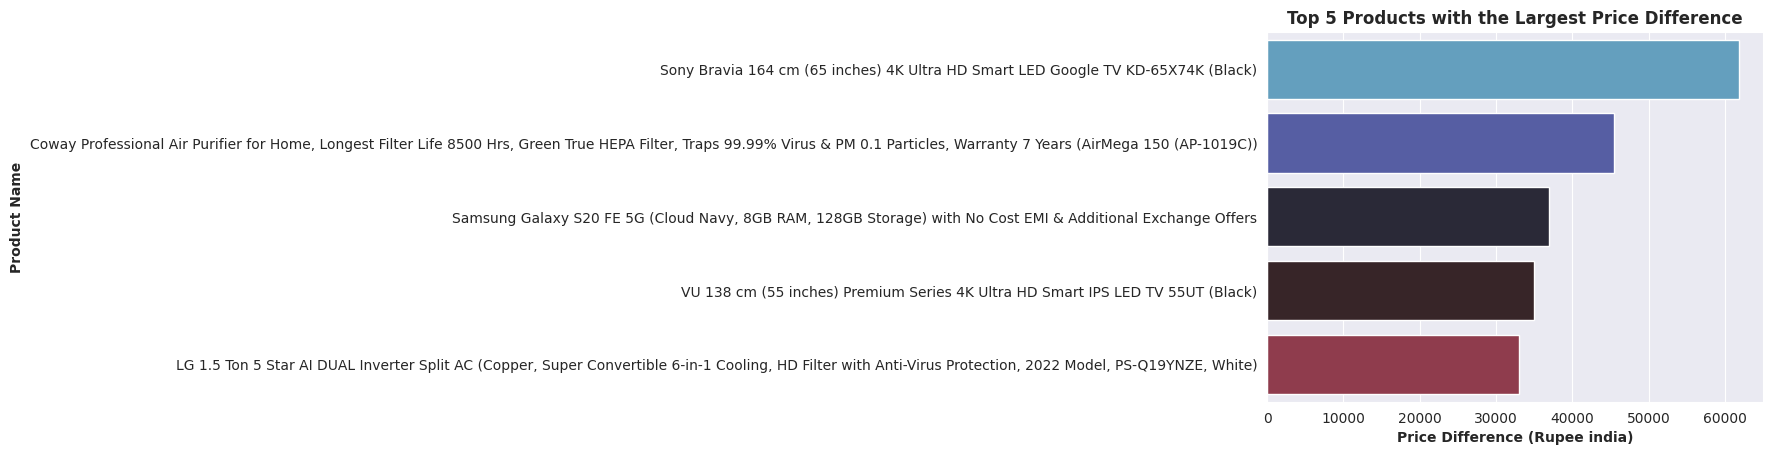

In [ ]:
#Top 5 Products with the largest difference in price due to discount (41)

dif_price_large = sns.barplot(data= df1.sort_values('difference_price', ascending=False).head(5), x='difference_price', y='product_name')

dif_price_large.set_title('Top 5 Products with the Largest Price Difference', fontweight='bold')
dif_price_large.set_xlabel('Price Difference (Rupee india)', fontweight='bold')
dif_price_large.set_ylabel('Product Name', fontweight='bold')

plt.show()

Observation 2: Correlation between Features


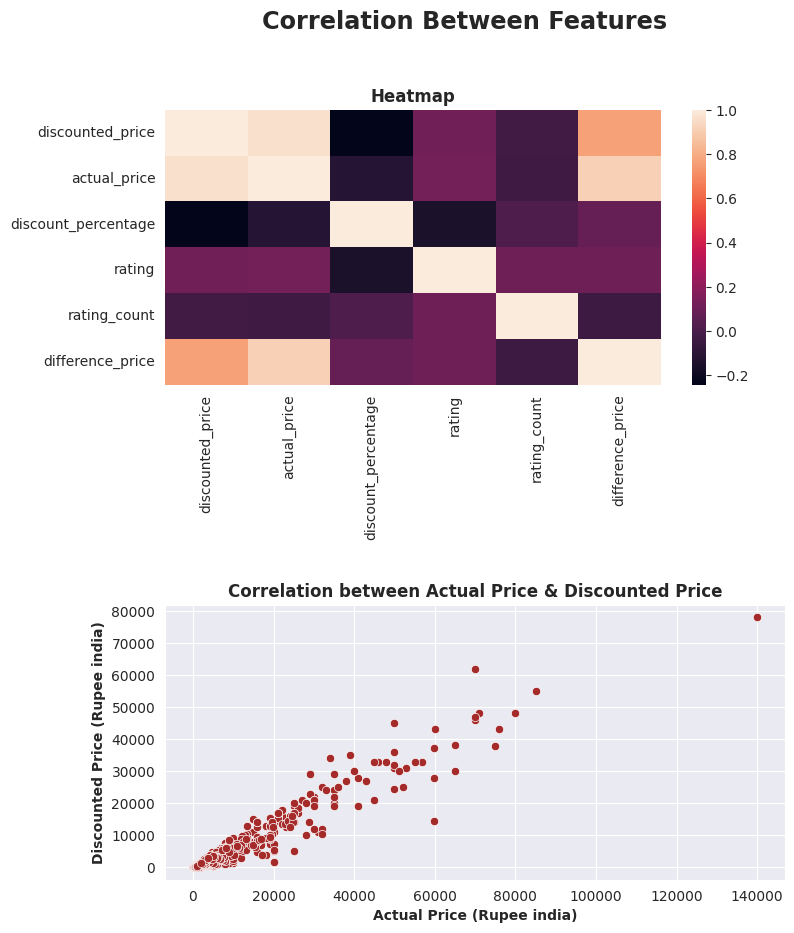

In [ ]:
#Heatmap & Correlation between Actual Price & Discounted Price (42)

fig, ax = plt.subplots(2, 1, figsize=(8, 10))

fig.suptitle('Correlation Between Features', fontweight='heavy', size='xx-large')

sns.heatmap(ax=ax[0], data=df1.corr())
sns.scatterplot(ax=ax[1], data=df1, y='discounted_price', x='actual_price', color='brown')

plt.subplots_adjust(hspace = 0.8)

ax[1].set_xlabel('Actual Price (Rupee india)', fontweight='bold')
ax[1].set_ylabel('Discounted Price (Rupee india)', fontweight='bold')

ax[0].set_title('Heatmap', fontweight='bold')
ax[1].set_title('Correlation between Actual Price & Discounted Price', fontweight='bold')

plt.show()

Observation 3: Product Ratings


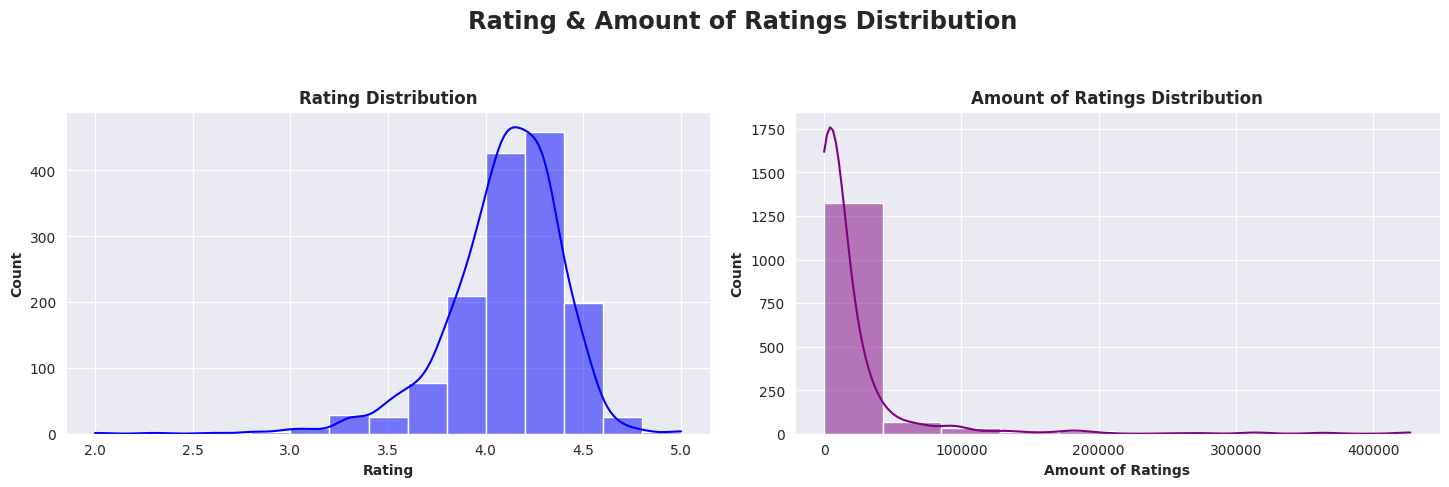

In [ ]:
#Rating & Amount of Rating Distribution (43)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Rating & Amount of Ratings Distribution', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=df1, x='rating', bins=15, kde=True, color='blue')
sns.histplot(ax=ax[1], data=df1, x='rating_count', bins=10, kde=True, color='purple')

ax[0].set_xlabel('Rating', fontweight='bold')
ax[1].set_xlabel('Amount of Ratings', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Rating Distribution', fontweight='bold')
ax[1].set_title('Amount of Ratings Distribution', fontweight='bold')

plt.show()

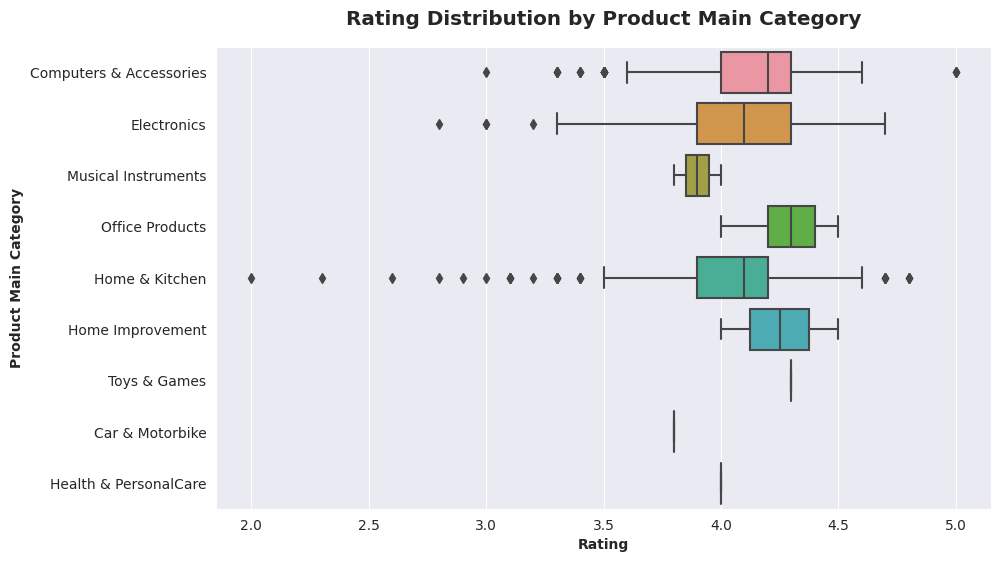

In [ ]:
#Rating Distribution by Product Main Category (44)

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(ax=ax, data=df1, x='rating', y='category_1')

ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Main Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

In [ ]:
#Rating of Products based on Rating Category (45)

rate_main_cat = df1.groupby(['category_1','rating_score']).agg('count').iloc[:,1].rename_axis().reset_index(name='Amount')

rate_main_cat = rate_main_cat.rename(columns = {'category_1' : 'Main Category', 'rating_score' : 'Rating Category'})

rate_main_cat

,Main Category,Rating Category,Amount
0,Car & Motorbike,Below Average,0
1,Car & Motorbike,Average,1
2,Car & Motorbike,Above Average,0
3,Car & Motorbike,Excellent,0
4,Computers & Accessories,Below Average,0
5,Computers & Accessories,Average,75
6,Computers & Accessories,Above Average,375
7,Computers & Accessories,Excellent,3
8,Electronics,Below Average,1
9,Electronics,Average,132


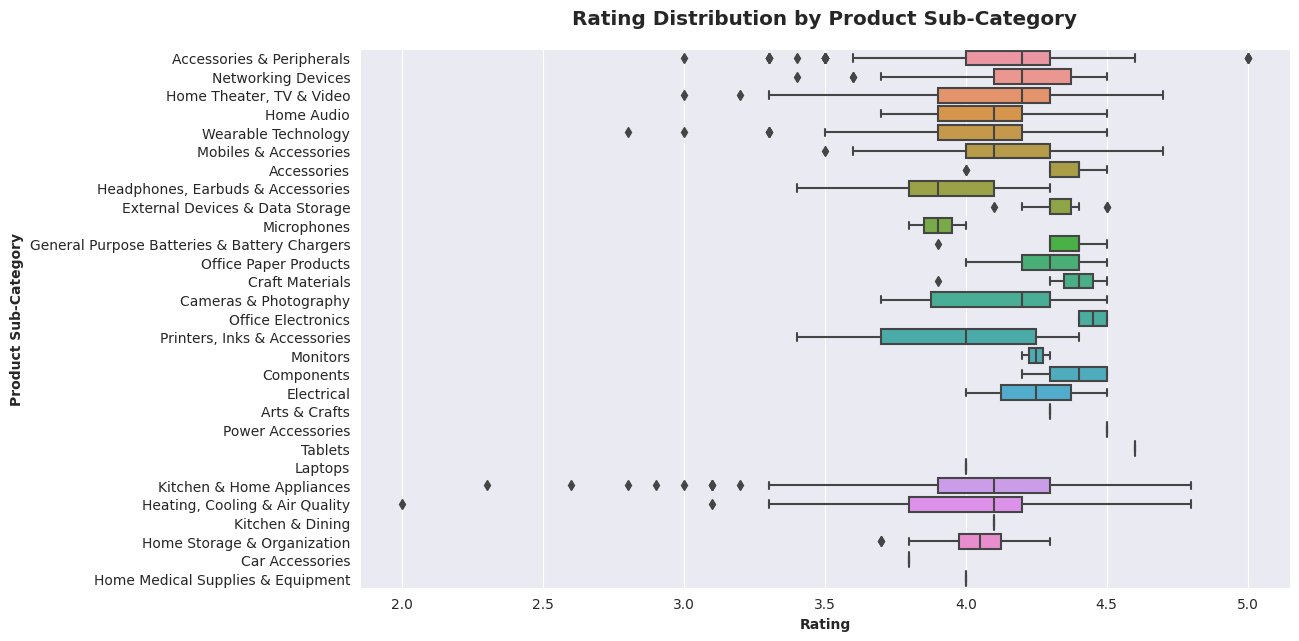

In [ ]:
#Rating Distribution by Product Sub-Category (46)

fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(ax=ax, data=df1, x='rating', y='category_2')

ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Sub-Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

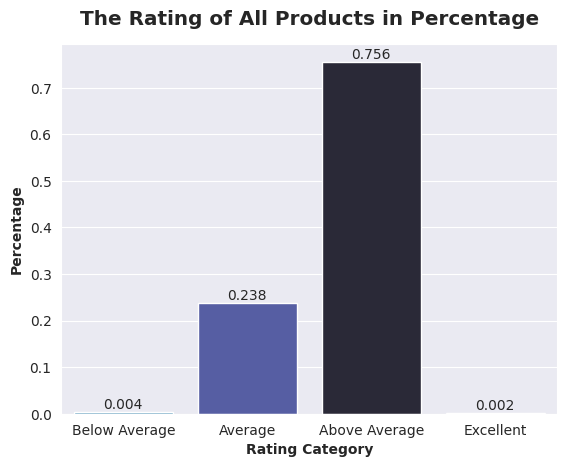

In [ ]:
#The Rating of All Products in Percentage (47)

rating_ordered = ['Below Average', 'Average', 'Above Average', 'Excellent']

rating_count = df1['rating_score'].value_counts(normalize=True).rename_axis('rating').reset_index(name='counts')

rating_count['counts'] = rating_count['counts'].round(3)

rating_count_plot = sns.barplot(data=rating_count, x='rating', y='counts', order=rating_ordered)

rating_count_plot.set_xlabel('Rating Category', fontweight='bold')
rating_count_plot.set_ylabel('Percentage', fontweight='bold')
rating_count_plot.set_title('The Rating of All Products in Percentage', fontweight='heavy', size='x-large', y=1.03)


rating_count_plot.bar_label(rating_count_plot.containers[0])

plt.show()

In [ ]:
#Pivot table of Rating (48)

def p25(g):
    return np.percentile(g, 25)

def p75(g):
    return np.percentile(g, 75)

rating_pivot = df1.pivot_table(values=['rating', 'rating_count'], index=['category_1', 'category_2'], aggfunc=([p25, np.median, np.mean, p75]))

rating_pivot = rating_pivot.rename(columns = {'rating':'Rating', 'rating_count': 'Rating Count', 'median':'Median', 'mean':'Mean'}, index={'category_1': 'Main Category', 'category_2': 'Sub Category'})

rating_pivot

p25  \
                                                                     Rating   
category_1              category_2                                            
Car & Motorbike         Car Accessories                               3.800   
Computers & Accessories Accessories & Peripherals                     4.000   
                        Components                                    4.300   
                        External Devices & Data Storage               4.300   
                        Laptops                                       4.000   
                        Monitors                                      4.225   
                        Networking Devices                            4.100   
                        Printers, Inks & Accessories                  3.700   
                        Tablets                                       4.600   
Electronics             Accessories                                   4.300   
                        Cameras & Photography                         3.875   
                        General Purpose Batteries & Battery Chargers  4.300   
                        Headphones, Earbuds & Accessories             3.800   
                        Home Audio                                    3.900   
                        Home Theater, TV & Video                      3.900   
                        Mobiles & Accessories                         4.000   
                        Power Accessories                             4.500   
                        Wearable Technology                           3.900   
Health & PersonalCare   Home Medical Supplies & Equipment             4.000   
Home & Kitchen          Craft Materials                               4.350   
                        Heating, Cooling & Air Quality                3.800   
                        Home Storage & Organization                   3.975   
                        Kitchen & Dining                              4.100   
                        Kitchen & Home Appliances                     3.900   
Home Improvement        Electrical                                    4.125   
Musical Instruments     Microphones                                   3.850   
Office Products         Office Electronics                            4.400   
                        Office Paper Products                         4.200   
Toys & Games            Arts & Crafts                                 4.300   

                                                                                   \
                                                                     Rating Count   
category_1              category_2                                                  
Car & Motorbike         Car Accessories                                   1118.00   
Computers & Accessories Accessories & Peripherals                             NaN   
                        Components                                        2515.00   
                        External Devices & Data Storage                  19747.50   
                        Laptops                                            323.00   
                        Monitors                                          2166.25   
                        Networking Devices                               10281.75   
                        Printers, Inks & Accessories                      3435.50   
                        Tablets                                           2886.00   
Electronics             Accessories                                      67259.00   
                        Cameras & Photography                             5384.25   
                        General Purpose Batteries & Battery Chargers      1269.50   
                        Headphones, Earbuds & Accessories                 9881.75   
                        Home Audio                                        2625.75   
                        Home Theater, TV & Video                           426.50   
             

Observation 4: Reviewers

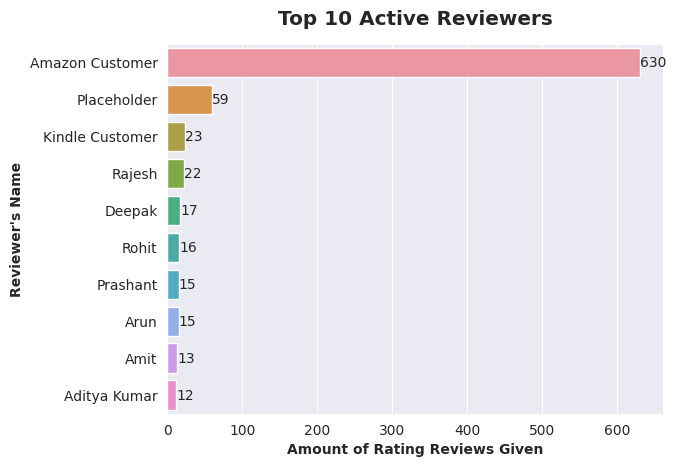

In [ ]:
#Reviewers who gave ratings and reviews for more than one product (49)

top_reviewer = data=df2['user_name'].value_counts().head(10).rename_axis('username').reset_index(name='counts')

top_review_plot = sns.barplot(data=top_reviewer, x='counts', y='username')

top_review_plot.bar_label(top_review_plot.containers[0])

top_review_plot.set_xlabel('Amount of Rating Reviews Given', fontweight='bold')
top_review_plot.set_ylabel("Reviewer's Name", fontweight='bold')
top_review_plot.set_title('Top 10 Active Reviewers', fontweight='heavy', size='x-large', y=1.03)

plt.show()

Observation 5: Product Pricing

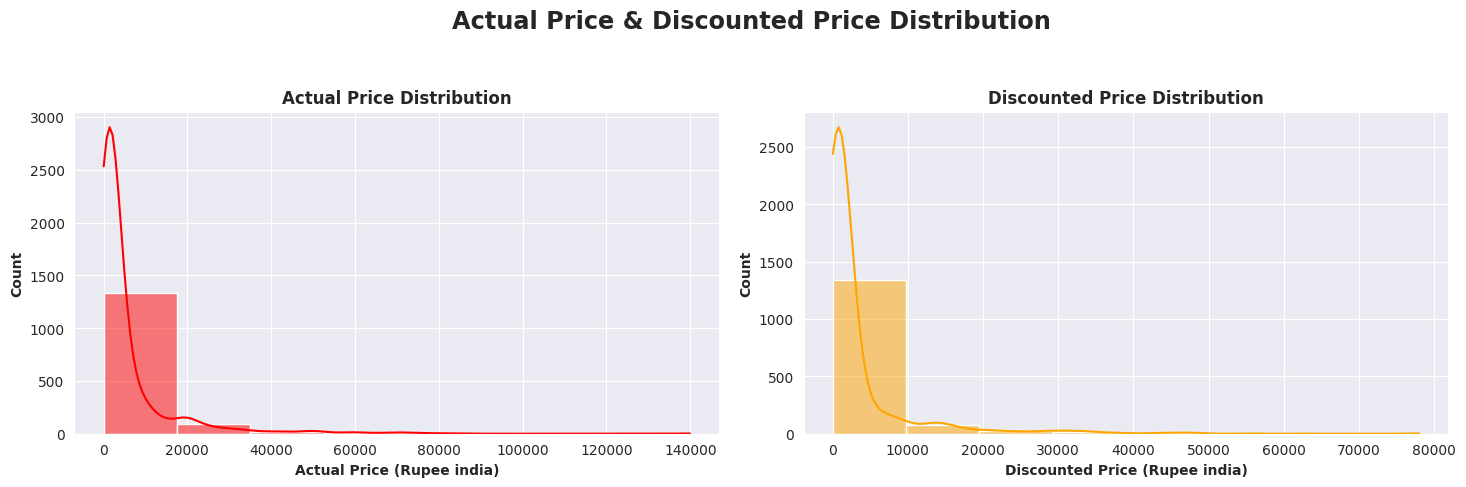

In [ ]:
#Actual Price & Discounted Price Distribution (50)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Actual Price & Discounted Price Distribution', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=df1, x='actual_price', bins=8, kde=True, color='red')
sns.histplot(ax=ax[1], data=df1, x='discounted_price', bins=8, kde=True, color='orange')

ax[0].set_xlabel('Actual Price (Rupee india)', fontweight='bold')
ax[1].set_xlabel('Discounted Price (Rupee india)', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Actual Price Distribution', fontweight='bold')
ax[1].set_title('Discounted Price Distribution', fontweight='bold')

plt.show()

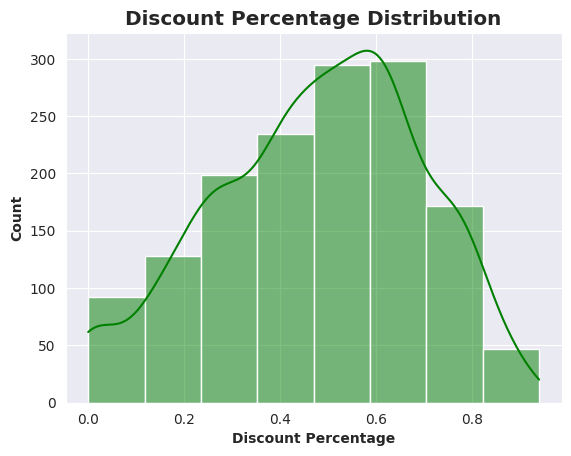

In [ ]:
#Discount Percentage Distribution (51)

disc_hist = sns.histplot(data=df1, x='discount_percentage', bins=8, kde=True, color='green')


disc_hist.set_xlabel('Discount Percentage', fontweight='bold')
disc_hist.set_ylabel('Count', fontweight='bold')
disc_hist.set_title('Discount Percentage Distribution', fontweight='heavy', size='x-large')

plt.show()

In [ ]:
#Specific Details about the Discount Percentage (52)

df1['discount_percentage'].describe()

count    1465.000000
mean        0.476915
std         0.216359
min         0.000000
25%         0.320000
50%         0.500000
75%         0.630000
max         0.940000
Name: discount_percentage, dtype: float64

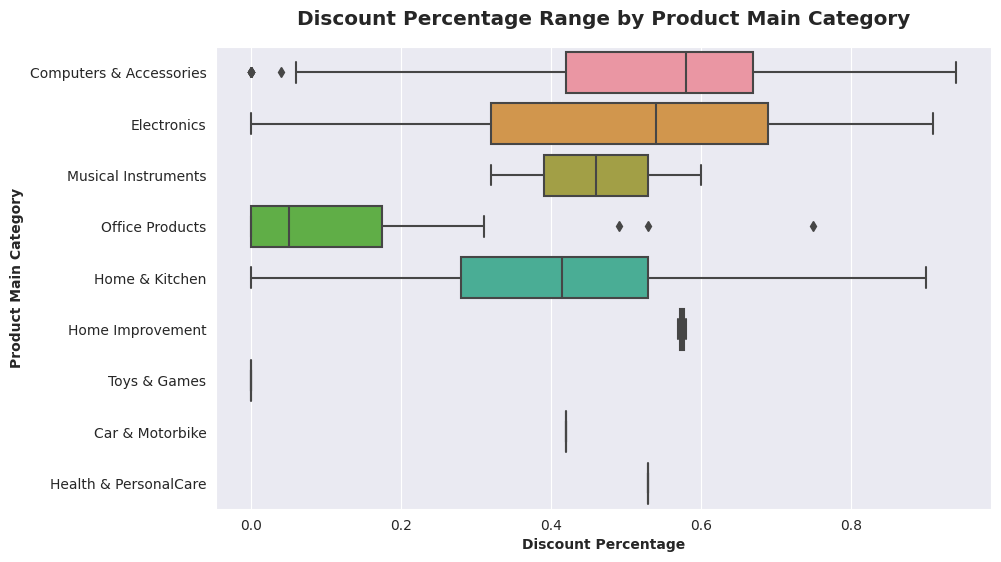

In [ ]:
# The Discount Range by Product Main Category (53)

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df1, x='discount_percentage', y='category_1')

ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Discount Percentage Range by Product Main Category', fontweight='heavy', size='x-large', y=1.03)


plt.show()

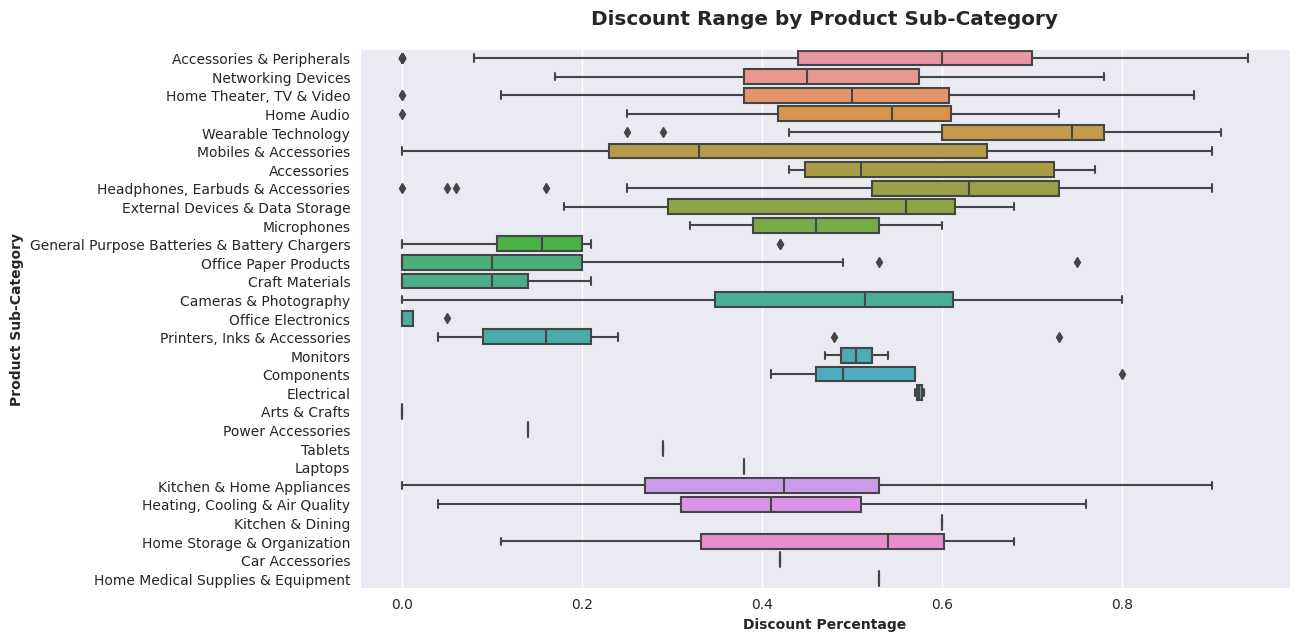

In [ ]:
# The Discount Range by Product Sub-Category (54)

fig, ax = plt.subplots(figsize=(12, 7))

sns.boxplot(data=df1, x='discount_percentage', y='category_2')

ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Discount Range by Product Sub-Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

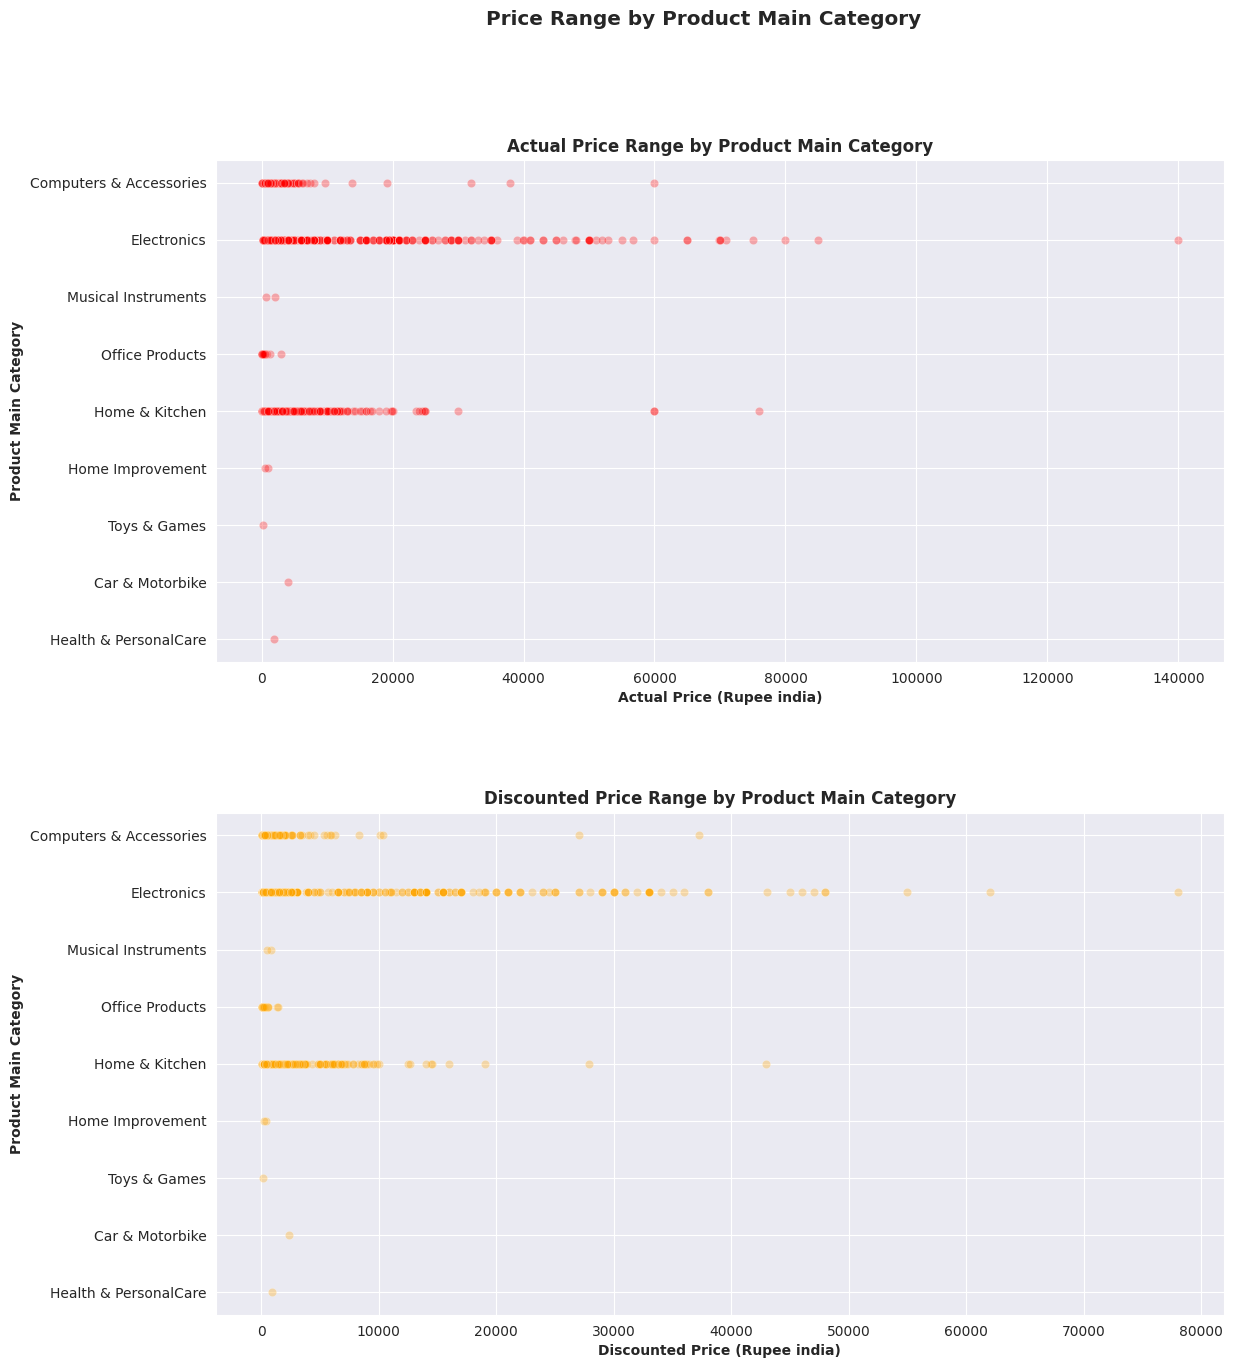

In [ ]:
#Actual Price Range and Discounted Price Range by Product Main Category (55)

fig, ax = plt.subplots(2, 1, figsize=(13,15))

fig.suptitle('Price Range by Product Main Category', fontweight='heavy', size='x-large')

sns.scatterplot(ax=ax[0], data=df1, x='actual_price', y='category_1', alpha=0.3, color='red')
sns.scatterplot(ax=ax[1], data=df1, x='discounted_price', y='category_1', alpha=0.3, color='orange')

ax[0].set_xlabel('Actual Price (Rupee india)', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')
ax[0].set_title('Actual Price Range by Product Main Category', fontweight='bold')

ax[1].set_xlabel('Discounted Price (Rupee india)', fontweight='bold')
ax[1].set_ylabel('Product Main Category', fontweight='bold')
ax[1].set_title('Discounted Price Range by Product Main Category', fontweight='bold')

plt.subplots_adjust(hspace = 0.3)

plt.show()

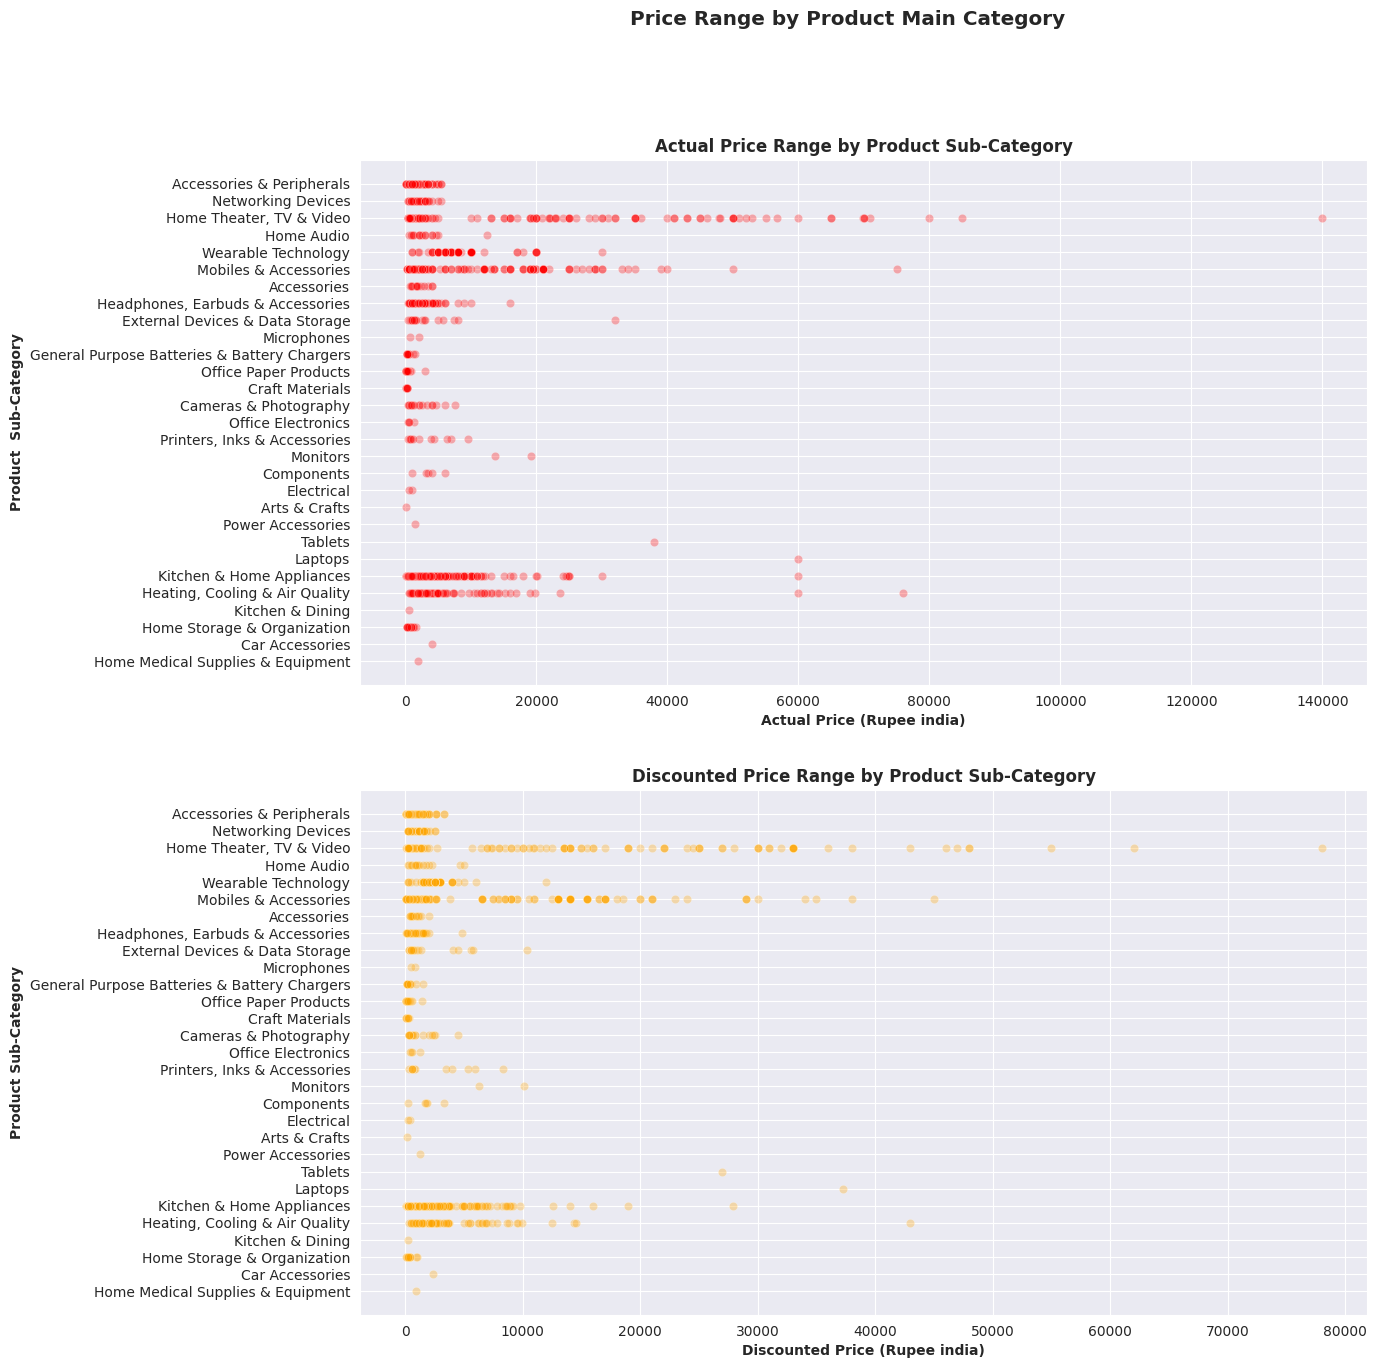

In [ ]:
#Actual Price Range and Discounted Price Range by Product Sub Category(56)

fig, ax = plt.subplots(2, 1, figsize=(13, 15))

fig.suptitle('Price Range by Product Main Category', fontweight='heavy', size='x-large')

sns.scatterplot(ax=ax[0], data=df1, x='actual_price', y='category_2', alpha=0.3, color='red')
sns.scatterplot(ax=ax[1], data=df1, x='discounted_price', y='category_2', alpha=0.3, color='orange')

ax[0].set_xlabel('Actual Price (Rupee india)', fontweight='bold')
ax[0].set_ylabel('Product  Sub-Category', fontweight='bold')
ax[0].set_title('Actual Price Range by Product Sub-Category', fontweight='bold')

ax[1].set_xlabel('Discounted Price (Rupee india)', fontweight='bold')
ax[1].set_ylabel('Product Sub-Category', fontweight='bold')
ax[1].set_title('Discounted Price Range by Product Sub-Category', fontweight='bold')

plt.subplots_adjust(hspace = 0.2)

plt.show()

In [ ]:
#Pivot table of Prices(57)

def p25(g):
    return np.percentile(g, 25)

def p75(g):
    return np.percentile(g, 75)

actual_price_pivot = df1.pivot_table(values=['actual_price', 'discounted_price'], index=['category_1', 'category_2'], aggfunc=([p25, np.median, np.mean, p75]))

actual_price_pivot

p25  \
                                                                     actual_price   
category_1              category_2                                                  
Car & Motorbike         Car Accessories                                   4000.00   
Computers & Accessories Accessories & Peripherals                          499.00   
                        Components                                        3100.00   
                        External Devices & Data Storage                   1074.25   
                        Laptops                                          59890.00   
                        Monitors                                         15090.00   
                        Networking Devices                                1208.00   
                        Printers, Inks & Accessories                       811.00   
                        Tablets                                          37999.00   
Electronics             Accessories                                       1150.00   
                        Cameras & Photography                              946.00   
                        General Purpose Batteries & Battery Chargers       205.00   
                        Headphones, Earbuds & Accessories                  999.00   
                        Home Audio                                        1274.00   
                        Home Theater, TV & Video                           824.00   
                        Mobiles & Accessories                             1299.00   
                        Power Accessories                                 1499.00   
                        Wearable Technology                               5999.00   
Health & PersonalCare   Home Medical Supplies & Equipment                 1900.00   
Home & Kitchen          Craft Materials                                    132.50   
                        Heating, Cooling & Air Quality                    1990.00   
                        Home Storage & Organization                        374.00   
                        Kitchen & Dining                                   495.00   
                        Kitchen & Home Appliances                         1000.00   
Home Improvement        Electrical                                         699.00   
Musical Instruments     Microphones                                       1023.00   
Office Products         Office Electronics                                 511.25   
                        Office Paper Products                              120.00   
Toys & Games            Arts & Crafts                                      150.00   

                                                                                       \
                                                                     discounted_price   
category_1              category_2                                                      
Car & Motorbike         Car Accessories                                       2339.00   
Computers & Accessories Accessories & Peripherals                              199.00   
                        Components                                            1709.00   
                        External Devices & Data Storage                        504.00   
                        Laptops                                              37247.00   
                        Monitors                                              7249.00   
                        Networking Devices                                     530.00   
                        Printers, Inks & Accessories                           597.00   
                        Tablets                                              26999.00   
Electronics             Accessories                                            479.00   
                        Cameras & Photography                                  386.50   
                        General Purpose Batteries & Battery Chargers           166.75   
                      

In [ ]:
#df.describe()

In [ ]:
#df.isnull().sum()

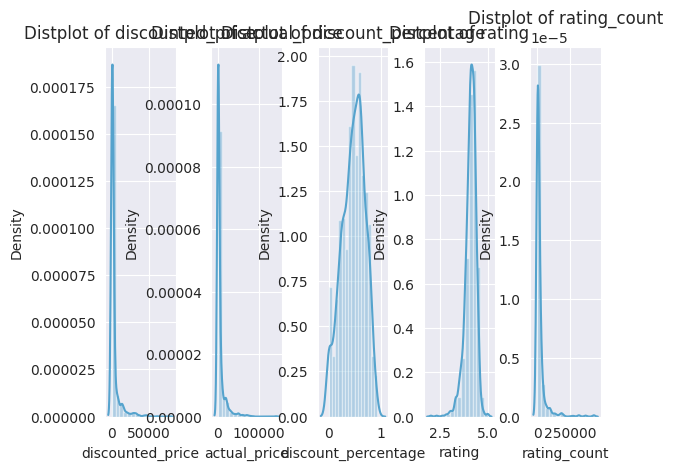

In [ ]:
#plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['discounted_price' , 'actual_price' , 'discount_percentage','rating','rating_count']:
    n += 1
    plt.subplot(1 , 5 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [ ]:
df.shape

(1465, 16)

In [ ]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [ ]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [ ]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1463.000000
mean,3125.310874,5444.990635,0.476915,4.096519,18295.541353
std,6944.304394,10874.826864,0.216359,0.291585,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1186.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17336.500000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


In [ ]:
X = df

y = df['product_id']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['product_id'] = le.fit_transform(X['product_id'])

y = le.transform(y)

In [ ]:
X = df

y = df['product_name']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['product_name'] = le.fit_transform(X['product_name'])

y = le.transform(y)

In [ ]:
X = df

y = df['category']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['category'] = le.fit_transform(X['category'])

y = le.transform(y)

In [ ]:
X = df

y = df['discounted_price']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['discounted_price'] = le.fit_transform(X['discounted_price'])

y = le.transform(y)

In [ ]:
X = df

y = df['discount_percentage']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['discount_percentage'] = le.fit_transform(X['discount_percentage'])

y = le.transform(y)

In [ ]:
X = df

y = df['actual_price']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['actual_price'] = le.fit_transform(X['actual_price'])

y = le.transform(y)

In [ ]:
X = df

y = df['rating']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['rating'] = le.fit_transform(X['rating'])

y = le.transform(y)

In [ ]:
X = df

y = df['rating_count']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['rating_count'] = le.fit_transform(X['rating_count'])

y = le.transform(y)

In [ ]:
X = df

y = df['about_product']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['about_product'] = le.fit_transform(X['about_product'])

y = le.transform(y)

In [ ]:
X = df

y = df['user_id']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['user_id'] = le.fit_transform(X['user_id'])

y = le.transform(y)

In [ ]:
X = df

y = df['user_name']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['user_name'] = le.fit_transform(X['user_name'])

y = le.transform(y)

In [ ]:
X = df

y = df['review_id']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['review_id'] = le.fit_transform(X['review_id'])

y = le.transform(y)

In [ ]:
X = df

y = df['review_title']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['review_title'] = le.fit_transform(X['review_title'])

y = le.transform(y)

In [ ]:
X = df

y = df['review_content']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['review_content'] = le.fit_transform(X['review_content'])

y = le.transform(y)

In [ ]:
X = df

y = df['img_link']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['img_link'] = le.fit_transform(X['img_link'])

y = le.transform(y)

In [ ]:
X = df

y = df['product_link']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['product_link'] = le.fit_transform(X['product_link'])

y = le.transform(y)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   product_id           1465 non-null   int64
 1   product_name         1465 non-null   int64
 2   category             1465 non-null   int64
 3   discounted_price     1465 non-null   int64
 4   actual_price         1465 non-null   int64
 5   discount_percentage  1465 non-null   int64
 6   rating               1465 non-null   int64
 7   rating_count         1465 non-null   int64
 8   about_product        1465 non-null   int64
 9   user_id              1465 non-null   int64
 10  user_name            1465 non-null   int64
 11  review_id            1465 non-null   int64
 12  review_title         1465 non-null   int64
 13  review_content       1465 non-null   int64
 14  img_link             1465 non-null   int64
 15  product_link         1465 non-null   int64
dtypes: int64(16)
memory usag

In [ ]:
X.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,346,1158,10,138,105,63,17,947,474,623,522,817,881,604,1118,1308
1,848,134,10,52,33,42,15,1042,279,88,207,1025,7,413,1248,157
2,819,1023,10,52,163,89,14,685,1250,849,482,827,422,674,876,1160
3,643,1264,10,110,66,52,17,1102,1010,254,614,786,376,269,518,380
4,588,829,10,29,38,60,17,878,1189,17,1139,114,44,120,1209,919


In [ ]:
cols = X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

In [ ]:
X.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,0.256296,0.866766,0.047619,0.251366,0.234375,0.692308,0.708333,0.828521,0.366873,0.522213,0.437552,0.684828,0.738474,0.498761,0.792346,0.893443
1,0.628148,0.100299,0.047619,0.094718,0.073661,0.461538,0.625000,0.911636,0.215944,0.073764,0.173512,0.859179,0.005868,0.341040,0.884479,0.107240
2,0.606667,0.765719,0.047619,0.094718,0.363839,0.978022,0.583333,0.599300,0.967492,0.711651,0.404023,0.693210,0.353730,0.556565,0.620836,0.792350
3,0.476296,0.946108,0.047619,0.200364,0.147321,0.571429,0.708333,0.964129,0.781734,0.212909,0.514669,0.658843,0.315172,0.222130,0.367116,0.259563
4,0.435556,0.620509,0.047619,0.052823,0.084821,0.659341,0.708333,0.768154,0.920279,0.014250,0.954736,0.095557,0.036882,0.099092,0.856839,0.627732


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[0.46666141, 0.2540232 , 0.48553166, 0.37633766, 0.32993862,
        0.49592595, 0.66666667, 0.46156695, 0.43262406, 0.50603663,
        0.49600177, 0.49863313, 0.51546426, 0.51438401, 0.52697656,
        0.26645748],
       [0.53617462, 0.73308934, 0.42310869, 0.48371307, 0.4524621 ,
        0.529653  , 0.6642028 , 0.55197322, 0.56388551, 0.49730083,
        0.51661411, 0.4874966 , 0.48868399, 0.47496286, 0.47193489,
        0.71604985]])

In [ ]:
kmeans.inertia_

1613.2959557048857

In [ ]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 1 out of 1465 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.00


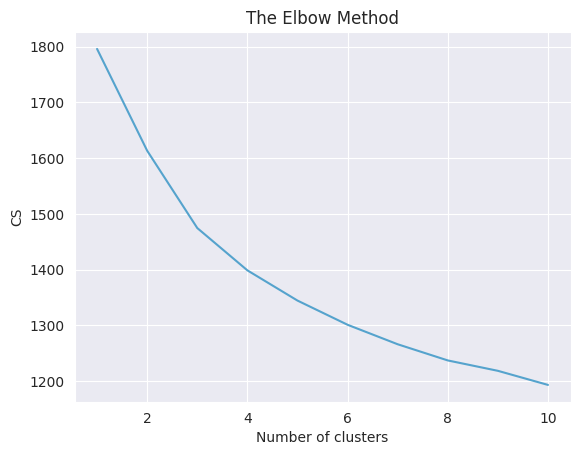

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1 out of 1465 samples were correctly labeled.
Accuracy score: 0.00


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 1 out of 1465 samples were correctly labeled.
Accuracy score: 0.00


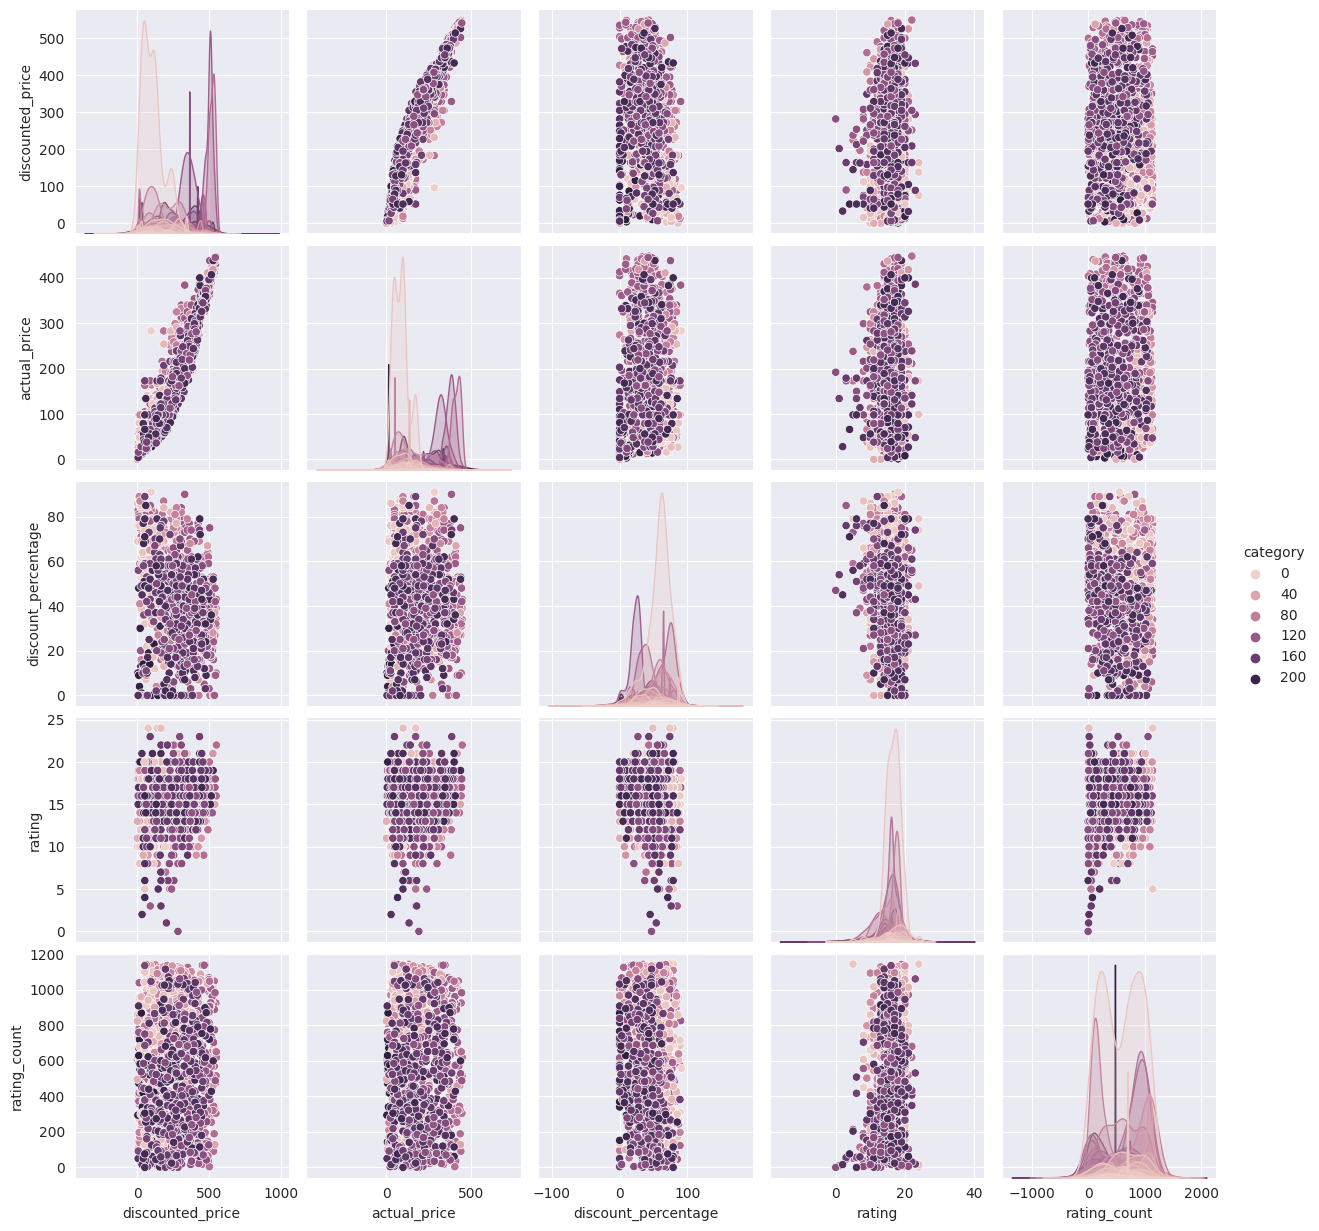

In [ ]:
sns.pairplot(df, vars = ['discounted_price' , 'actual_price' , 'discount_percentage','rating','rating_count'], hue = "category")

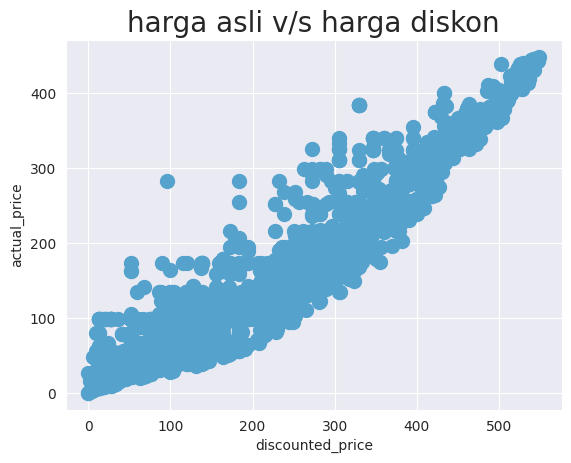

In [ ]:
#plt.figure(1 , figsize = (15 , 7))
plt.title('harga asli v/s harga diskon', fontsize = 20)
plt.xlabel('discounted_price')
plt.ylabel('actual_price')
plt.scatter( x = 'discounted_price', y = 'actual_price', data = df, s = 100)
plt.show()

In [ ]:
X1 = df[['discounted_price' , 'actual_price']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

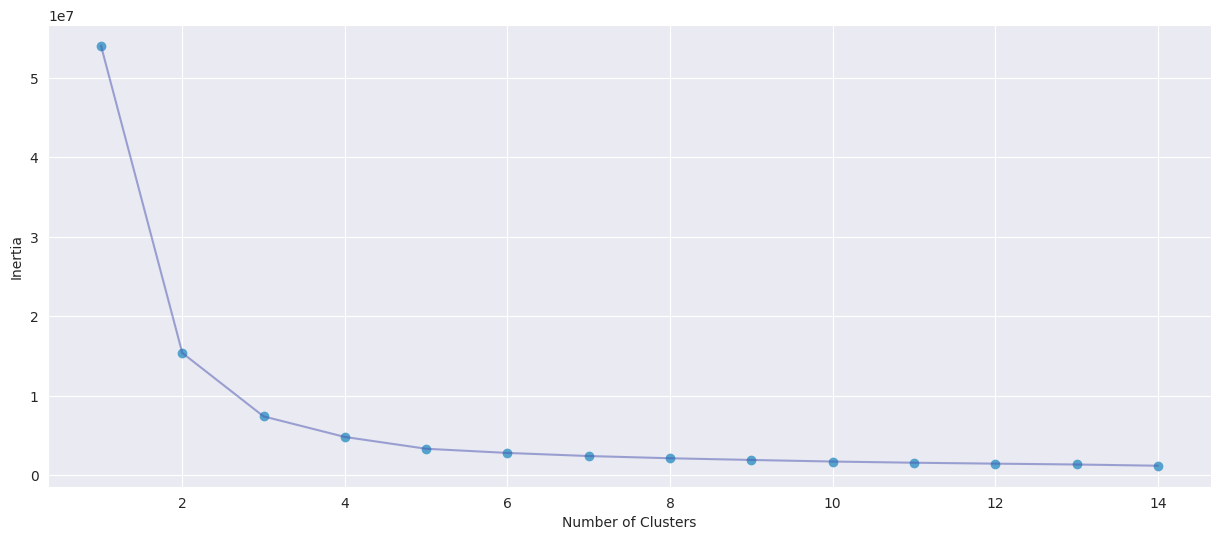

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_